<a href="https://colab.research.google.com/github/shubham-bhadouria/Book-Recommender-System/blob/main/Book_Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# **Importing Dataset**

In [2]:
books = pd.read_csv('/content/drive/MyDrive/Book Recommender System - Shubham Bhadouria/Copy of Books.csv')
ratings = pd.read_csv('/content/drive/MyDrive/Book Recommender System - Shubham Bhadouria/Copy of Ratings.csv')
users = pd.read_csv('/content/drive/MyDrive/Book Recommender System - Shubham Bhadouria/Copy of Users.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# **Dataset Overview**
**1.** **Books dataset**

In [3]:
# Checking number of rows and columns in books dataset.
print(f' The number of rows are {books.shape[0]}')
print(f' The number of columns are {books.shape[1]}')

 The number of rows are 271360
 The number of columns are 8


In [4]:
# Name of columns that we have in our dataset 
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [6]:
# View head of the dataset
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [7]:
#view tail of the dataset
books.tail()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...
271359,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...


**Looking for Duplicates and Missing values**

Last thing to check before moving on, is to look for the duplicates and missing values in the dataset. We can use the is_null() function from Pandas to check for any missing data and then use the sum() function to see the total of missing values in each column.

In [8]:
# Checking for duplicate Values in books dataset
books.duplicated().sum()

0

So, there are no duplicate values in books dataset.

In [9]:
# Checking the total null values in each column of book dataset
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

There are 1 missing author name, 2 missing publishers name and 3 missing Image-URL-L in book dataset.

Let us replace missing names of author and publication by 'Others' and drop the image columns from books dataset.

In [10]:
books['Publisher'].fillna('Others', inplace = True)            # replacing missing names of publisher by 'Others' 
books['Book-Author'].fillna('Others' , inplace = True)         # replacing missing names of author by 'Others' 
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)    # dropping the image columns 

In [11]:
# Again checking for null values in books dataset
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

Now, there are no missing values in books dataset, so we can move forward.

**Descriptive Analysis**


Generally, descriptive analyzes are the first manipulations performed in a quantitative study and their main objective is to summarize and explore the behavior of the data involved in the study.

In [12]:
books.info()     # It give us non-null values and data type of every column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271360 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271360 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


No column has null values and each column is of object type.

In [13]:
 #data information in terms of various statistics values of all the features of or dataset
 books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
count,271360,271360,271360,271360,271360
unique,271360,242135,102024,202,16808
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin
freq,1,27,632,13903,7535


**Exploratary Data Analysis**

Let's do Some Exploratary data analysis of our dataset and read our data closely to perform feature engineering.

**Univariate Analysis**

In univariate analysis, each variable is analysed separately.

In [14]:
# unique years of publications of various books
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

Here some values of year of publication year are wrongly entered. Let's correct them.

In [15]:
# Let's look at the observations where data of year of publications are wrongly entered in dataset
books[(books['Year-Of-Publication'] == 'DK Publishing Inc') | (books['Year-Of-Publication'] == 'Gallimard')]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


Let's make the dataset correct by making suitable changes

In [16]:
books.loc[(books['Year-Of-Publication'] == 'DK Publishing Inc'),['Year-Of-Publication', 'Book-Author','Publisher']] = ['2000' , 'Others', 'DK Publishing Inc']     # makes year of publication to 2000, publiser to DK Publishing Inc and Book-Author to Others
books.loc[(books['Year-Of-Publication'] == 'Gallimard'),['Year-Of-Publication', 'Book-Author','Publisher']] = ['2003' , 'Others', 'Gallimard']                     # makes year of publication to 2003, publiser to Gallimard and Book-Author to Others

Now some values of years are wrongly entered to 0 or greater than 2022. so let's correct them

In [33]:
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)     # converting datatype of publication year column to integer from string
books['Year-Of-Publication'] = np.where(books['Year-Of-Publication']>2022 , books['Year-Of-Publication'].median(),books['Year-Of-Publication'])        # replacing the values of publication year to median value where the publication year is greater than 2022. 
books['Year-Of-Publication'] = np.where(books['Year-Of-Publication']== 0 , books['Year-Of-Publication'].median(),books['Year-Of-Publication'])         # replacing the values of publication year to median value where the publication year is 0.

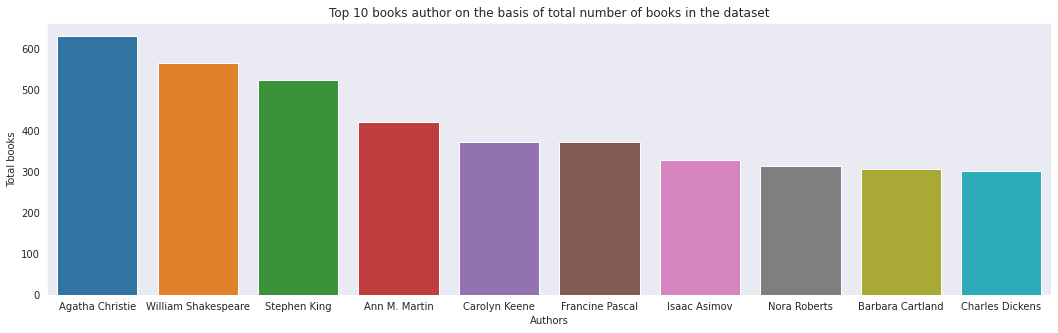

In [94]:
# Top 10 books author on the basis of total number of books in the dataset
sns.set_style('dark')
fig = plt.subplots(figsize=(18, 5))
sns.barplot(data= books['Book-Author'].value_counts()[0:10].reset_index(), x='index', y = 'Book-Author')
plt.title('Top 10 books author on the basis of total number of books in the dataset')
plt.ylabel('Total books')
plt.xlabel('Authors')
plt.show()

**Inference** : Agatha Christie has wrote maximum books(632) followed by William Shakespeare(567), Stephen king(524) and so on.

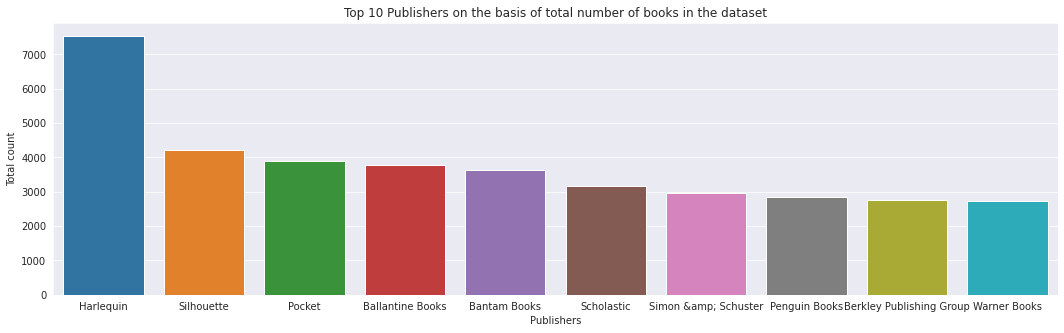

In [89]:
# Top 10 Publishers on the basis of total number of books in the dataset
sns.set_style('darkgrid')
fig = plt.subplots(figsize=(18, 5))
sns.barplot(data= books['Publisher'].value_counts()[0:10].reset_index(), x='index', y = 'Publisher')
plt.title('Top 10 Publishers on the basis of total number of books in the dataset')
plt.ylabel('Total count')
plt.xlabel('Publishers')
plt.show()

**Inference:** Harlequin published maximum books(7535) followed by Silhouette(4220),Pocket(3905) and so on.

In [95]:
 books['Publisher'].value_counts()[0:10]

Harlequin                   7535
Silhouette                  4220
Pocket                      3905
Ballantine Books            3783
Bantam Books                3646
Scholastic                  3160
Simon &amp; Schuster        2971
Penguin Books               2844
Berkley Publishing Group    2771
Warner Books                2727
Name: Publisher, dtype: int64